<a href="https://colab.research.google.com/github/maddy2005/Finance_project/blob/main/Analyze_historical_stock_price_data_to_understand_returns%2C_volatility%2C_and_trends_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install pandas numpy matplotlib yfinance


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [18]:
stock = "RELIANCE.NS"
data = yf.download(stock, start="2022-01-01", end="2024-01-01")


/tmp/ipython-input-3814704113.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [19]:
print(data.head())


Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2022-01-03  1093.780640  1095.646251  1075.443709  1076.103491     5421611
2022-01-04  1118.465088  1119.784652  1093.848914  1099.263652    10847728
2022-01-05  1123.697632  1127.064782  1107.021470  1120.239614    11643813
2022-01-06  1099.536621  1116.599603  1096.123977  1115.325533    14447422
2022-01-07  1108.409180  1118.442148  1097.284117  1106.111377    13112115


In [20]:
data.isnull().sum()


,,0
Price,Ticker,
Close,RELIANCE.NS,0
High,RELIANCE.NS,0
Low,RELIANCE.NS,0
Open,RELIANCE.NS,0
Volume,RELIANCE.NS,0


In [21]:
data = data[['Close']]


In [22]:
data['Daily_Return'] = data['Close'].pct_change()


In [23]:
data.dropna(inplace=True)


In [24]:
daily_volatility = data['Daily_Return'].std()
print("Daily Volatility:", daily_volatility)


Daily Volatility: 0.014158367929382833


In [25]:
annual_volatility = daily_volatility * np.sqrt(252)
print("Annualized Volatility:", annual_volatility)


Annualized Volatility: 0.2247571230701969


In [26]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()


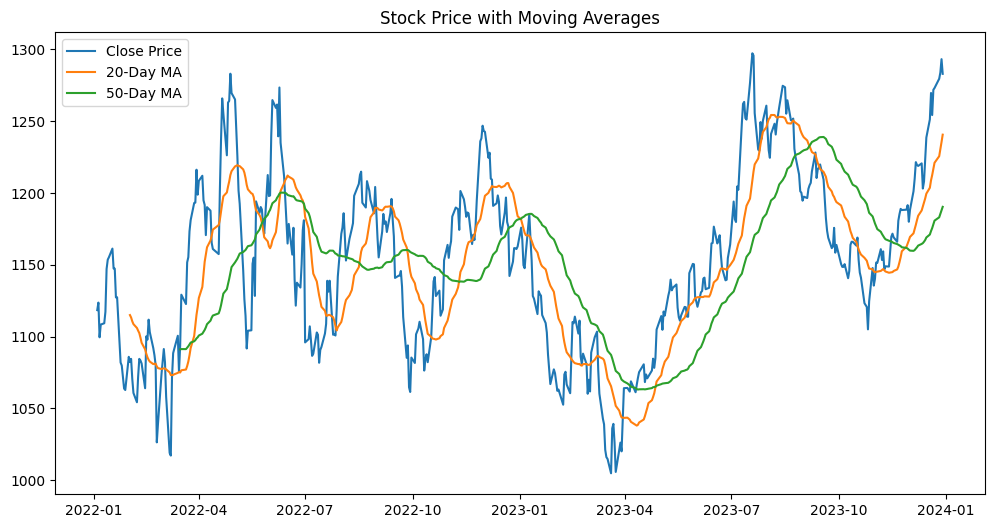

In [27]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA_20'], label='20-Day MA')
plt.plot(data['MA_50'], label='50-Day MA')
plt.legend()
plt.title("Stock Price with Moving Averages")
plt.show()


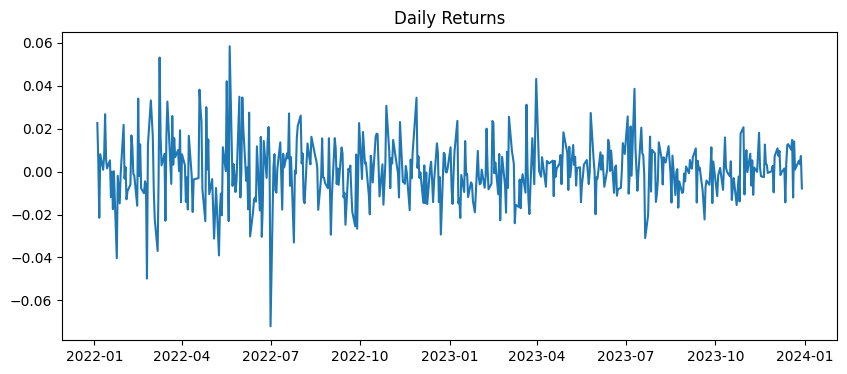

In [28]:
plt.figure(figsize=(10,4))
plt.plot(data['Daily_Return'])
plt.title("Daily Returns")
plt.show()


In [29]:
stocks = ['RELIANCE.NS', 'TCS.NS']
data = yf.download(stocks, start="2022-01-01", end="2024-01-01")['Close']

returns = data.pct_change()


/tmp/ipython-input-7417058.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start="2022-01-01", end="2024-01-01")['Close']
[*********************100%***********************]  2 of 2 completed


README

Stock shows higher volatility during market corrections

20-day MA crossing above 50-day MA indicates upward momentum

Returns are mostly centered around zero, indicating normal market behavior

Requirements

pandas

numpy

matplotlib

yfinance
